In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [17]:
# Dataset
df = pd.read_csv('../lung_cancer_examples.csv')

# Display the first few rows of the dataset
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [18]:
# Preprocess Data
# Select columns for features and target
X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Create and Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make Predictions and Evaluate
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92         7

    accuracy                           0.94        18
   macro avg       0.96      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18



In [21]:
# Test with a Specific Sample
sample = np.array([[30, 0, 5, 2]])  
prediction = rf.predict(sample)
sample_label=''

if prediction[0] == 1:
    sample_label = 'Cancer'
else:
    sample_label = 'Non-Cancer'

print('Prediction for sample [30, 0, 5, 2]:', sample_label)

Prediction for sample [30, 0, 5, 2]: Non-Cancer


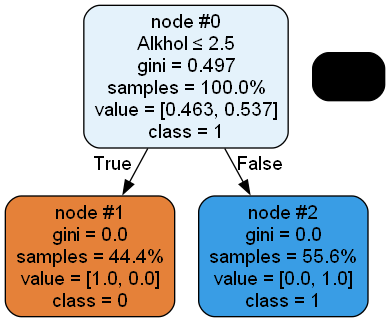

In [25]:
# Extract one tree from the forest (e.g., the first tree)
tree = rf.estimators_[0]

# Export the tree as DOT data with detailed visualization parameters
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=df.columns[2:-1],
                           class_names=[str(i) for i in set(y)],
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3,  # Limit the depth for better readability
                           node_ids=True,  # Show node IDs
                           proportion=True,  # Show proportions of samples
                           impurity=True,  # Show impurity
                           label='all',  # Include more detailed labels
                           leaves_parallel=False)  # Use parallel leaves

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Optionally, you can manually modify the DOT data here to add custom descriptions
# For example, appending some custom text to node labels

# Display the simplified tree image
Image(graph.create_png(), width=800, height=600)

In [23]:
# from sklearn.tree import plot_tree

# # Visualize all trees in the Random Forest
# n_estimators = len(rf.estimators_)
# plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# for i in range(n_estimators):
#     plt.subplot(2, (n_estimators // 2) + (n_estimators % 2), i + 1)
#     plot_tree(rf.estimators_[i], filled=True, feature_names=df.columns[2:-1], class_names=[str(i) for i in set(y)])
#     plt.title(f'Tree {i + 1}')

# plt.tight_layout()
# plt.show()
